# Homework 02 --- Session 3, Multilinear regression

## EX 1 Artificial data (25pt -- 5+5+5+10)
### Dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv'
### Tasks:
Consider a multivariate regression of the output variable $y$ over the 3 regressors $x_1$, $x_2$, $x_3$ as follows.
* (a) Which one of the regressors serves as dummy variable corresponding to an intercept term?
    * Ignore the first column since it's just a duplicate index (You can avoid it by running **ex1 = pd.read_csv('https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H31.csv', index_col=0)** )
* (b) Calculate the coefficients $\hat w$ manually or with python *numpy* module by using matrix computation.
* (c) Verify your answer by implementing the OLS regression function with python *statsmodels* module.
* (d) Visualize the data points and your fitted model in a 3D plot, like we did in the lab session.

## EX 2, Income vs Insurance coverage (35+10pt -- 10+10+5+10+10)
### Dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/IncomeInsReg.csv'
You are given the demographic data of insurance coverage in NYC, with the details:
* Zip code
* Total population (for each zip code)
* Population with No Insurance coverage
* Population with Insurance coverage
    * Population with Public Insurance coverage
    * Population with Private Insurance coverage

### Tasks:
* (a) Verify that there are some people with BOTH public insurance and private insurance according to this data set, then create a new column containing such information
* (b) Modify the old data frame, or simply create a new one, such that this data frame contains (including but not limited to) the following information in each zipcode area:
    * IncomePerCapita
    * Total Population
    * Population with NO Insurance coverage
    * Population with Public Insurance coverage ONLY
    * Population with Private Insurance coverage ONLY
    * Population with BOTH types of Insurance coverage
* (c) Similar to the lab example, drop the parts with NaN(if any), convert all population number into proportion (percentage, with the form 58.3 instead of 0.583)
* (d) Regress over these proportions (the ones mentioned in part b, leave out "No Insurance Coverage") -- What interesting results do we have here? Briefly state what you've obtained.
#### Extra credit:
* (e) Visualize the observed income versus the predicted income, like what we did in the lab session. Does this fitted line look great or not? If you're not sure, check the correlation matrix and make a guess.

## EX 3, Polynomial fit (40+30pt -- 4+5+3$\times$4+5+3$\times$3+5+30)

### Try to fit y with a polynomial $$\hat y(x,w) = \sum\limits_{i=1}^M w_i\cdot x^i$$ with the given dataset 'https://serv.cusp.nyu.edu/~cq299/ADS2016/Data/H33.csv'

### Tasks:
* (a) Draw the scatter plot of x and y, guess what polynomial could be the best choice. (The name "x1" denotes $x^1$.)
* (b) Create new columns in data frame to contain the information of $x^2, x^3, x^4$
* (c) Try to fit y with polynomial of x with order 1, 2, 3, 4, respectively
    * For each model, store your fitted parameters as well as your $R^2$
* (d) Report the $R^2$, plot it and observe how it changes
* (e) Create a figure with four(4) subfigures, then in each subfigure:
    * (e.1) Draw the scatter plot
    * (e.2) Plot the curve of true function $f(x) = 9x^2 - x + 1$
    * (e.3) Plot your fitted curve, observe how our model fits the data as M increases
* (f) Based on the plot, which model(s) fits the true curve best? Then provide the best coefficients $\hat w$
### Extra credit
* (g) In each subfigure:
    * (g.1) Pick a x value (at your discretion) $x_0$, then locate the y value both on your fitted curve and on our function curve ($f(x_0)$)
    * (g.2) Mark these two points with a small diamond, then draw a dashed line connecting them, showing "prediction error" (You can read the lecture slides and find some inspiration at the end.)
    * (g.3) Repeat g.1 and g.2 up to ten times (i.e. select up to ten different future points and predict their values, compare your prediction with the true value), then:
        * Compute the average sum of squares of errors $E = \frac{\sum_i^n (y_i - f(x_i))^2}{n}$ ($x_i$ denotes your future points), mention it in your subfigure's title (**Be sure to use the SAME future points for ALL 4 models when you calculate prediction error**)
        * Which model has the smallest average error $E$? Does this fitted polynomial coincides with the M you picked in part f?

# Solution

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


## EX 1

In [16]:
ex1 = pd.read_csv('H31.csv',index_col=0)
# (a) x1 since they are all 1

In [18]:
# (b)
X = np.matrix(ex1.iloc[:,1:])
Y = np.matrix(ex1.y).T
w = (X.T * X).I * X.T * Y
print(w)

[[ 2. ]
 [ 0.7]
 [-0.5]]


In [19]:
# (c)
coef = smf.ols(formula = 'y ~ x2 + x3', data = ex1).fit().params
print(coef)

Intercept    2.0
x2           0.7
x3          -0.5
dtype: float64


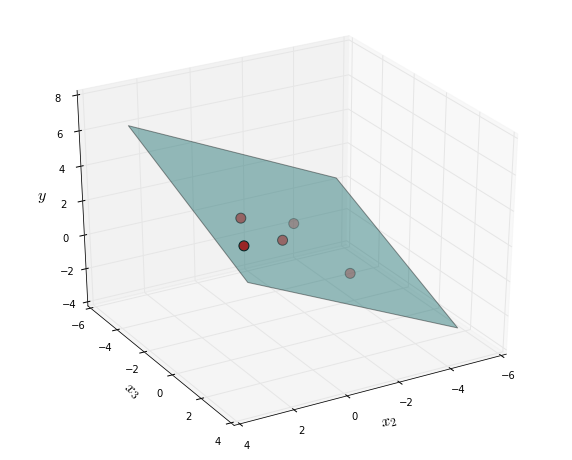

In [23]:
# (d)
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')   # Extract the axis for further operations
ax.scatter(ex1.x2, ex1.x3, ex1.y, c = 'r', s = 100)
# Scatter plot, "c" stands for color, and "s" determines the marker size
steps = np.arange(-5,5,2)
# Generate coordinates for hyperplane:
xx, yy = np.meshgrid(steps, steps)
zz = coef[0] + coef[1] * xx + coef[2] * yy

ax.plot_surface(xx,yy,zz, color='c', alpha = 0.4)  # alpha controls the transparency
ax.set_xlabel('$x_2$', fontsize = 16)
ax.set_ylabel('$x_3$', fontsize = 16)
ax.set_zlabel('$y$', fontsize = 16)
ax.view_init(azim=60)    #Students may change the view angle so the plots may look different
plt.show()

## EX 2

In [7]:
#(a)
ex2 = pd.read_csv('IncomeInsReg.csv', index_col = 0)
ex2['Both'] = (ex2.iloc[:,-2:].sum(1) - ex2.WithCoverage)
ex2.head()

,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private,Both
Zipcode,,,,,,,
10001,77512.0,22767,1958,20809,5800,16795,1786
10002,26905.0,79490,9129,70361,40139,35167,4945
10003,79088.0,56909,3774,53135,8593,48522,3980
10004,98020.0,3024,244,2780,180,2705,105
10005,99633.0,7566,570,6996,122,6944,70


In [6]:
#(b)
ex2.Public -= ex2.Both
ex2.Private -= ex2.Both
ex2.head()

,IncomePerCapita,TotalPop,NoCoverage,WithCoverage,Public,Private,Both
Zipcode,,,,,,,
10001,77512.0,22767,1958,20809,4014,15009,1786
10002,26905.0,79490,9129,70361,35194,30222,4945
10003,79088.0,56909,3774,53135,4613,44542,3980
10004,98020.0,3024,244,2780,75,2600,105
10005,99633.0,7566,570,6996,52,6874,70


In [8]:
#(c)
ex2 = ex2.dropna()  #drop NAN to avoid invalid computation
ex2 = pd.concat([ex2.IncomePerCapita,      # Convert unit to 1k USD, only for scaling purpose
        100*ex2.iloc[:,2:].div(ex2.TotalPop, axis = 0)],  # Compute the percentage, column-wise
        axis = 1)  # Concatenate the Income column with percentages, row-wise
ex2.head()

,IncomePerCapita,NoCoverage,WithCoverage,Public,Private,Both
Zipcode,,,,,,
10001,77512.0,8.600167,91.399833,25.475469,73.769052,7.844687
10002,26905.0,11.484463,88.515537,50.495660,44.240785,6.220908
10003,79088.0,6.631640,93.368360,15.099545,85.262437,6.993621
10004,98020.0,8.068783,91.931217,5.952381,89.451058,3.472222
10005,99633.0,7.533703,92.466297,1.612477,91.779011,0.925192


In [9]:
#(d)
lm = smf.ols(formula = 'IncomePerCapita ~ Public + Private + Both', data = ex2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     97.17
Date:                Tue, 20 Sep 2016   Prob (F-statistic):           3.25e-37
Time:                        13:48:04   Log-Likelihood:                -2033.2
No. Observations:                 181   AIC:                             4074.
Df Residuals:                     177   BIC:                             4087.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -6.303e+04   2.76e+04     -2.280      0.0

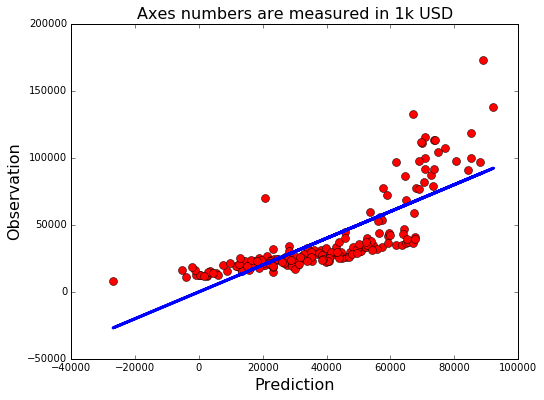

In [10]:
#(e)
lmy = lm.predict(ex2)   # Calculate the predicted value
plt.figure(figsize = (8,6))
plt.plot(lmy,ex2.IncomePerCapita,'or', markersize = 8) # Plot the observed value
plt.plot(lmy,lmy,'-b', lw = 3)                         # Plot the predicted value
# Students are not required to have such visualization settings as long as they got the correct answer
plt.xlabel('Prediction', fontsize = 16)
plt.ylabel('Observation', fontsize = 16)
plt.title('Axes numbers are measured in 1k USD', fontsize = 16)

In [11]:
ex2.corr()

,IncomePerCapita,NoCoverage,WithCoverage,Public,Private,Both
IncomePerCapita,1.000000,-0.602753,0.602753,-0.746417,0.778040,0.101578
NoCoverage,-0.602753,1.000000,-1.000000,0.556389,-0.679430,-0.344447
WithCoverage,0.602753,-1.000000,1.000000,-0.556389,0.679430,0.344447
Public,-0.746417,0.556389,-0.556389,1.000000,-0.940209,-0.201309
Private,0.778040,-0.679430,0.679430,-0.940209,1.000000,-0.024644
Both,0.101578,-0.344447,0.344447,-0.201309,-0.024644,1.000000


# For (d), Students are expected to answer something like "The coefficient of 'Private Insurance Coverage' is the highest, which can be associated with a reasonable guess that, the people who are willing to pay for private insurance are generally richer than others."
# For (e), they should mention something like "this approximation results' interpretability suffers from multicolinearity."
# If they didn't say such things but only present the plots and/or numeric results, such as coefficients, then partial credits should be granted.
# The proportion is up to you. Thanks!

## EX 3

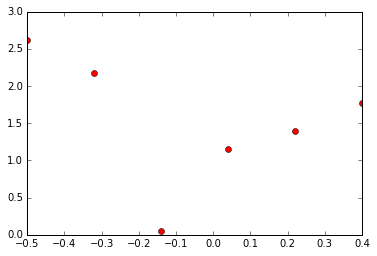

In [11]:
ex3 = pd.read_csv('H33.csv')
#(a)
plt.plot(ex3.x1,ex3.y,'ro')
# Guess quadratic function

In [12]:
#(b)
ex3 = pd.DataFrame([ex3.y]+[ex3.x1**(i+1) for i in range(4)]).T
ex3.columns = ['y']+['x%d'%(i+1) for i in range(4)]
ex3.head()

,y,x1,x2,x3,x4
0,2.613388,-0.50,0.2500,-0.125000,0.062500
1,2.170351,-0.32,0.1024,-0.032768,0.010486
2,0.049546,-0.14,0.0196,-0.002744,0.000384
3,1.158258,0.04,0.0016,0.000064,0.000003
4,1.397567,0.22,0.0484,0.010648,0.002343


In [14]:
#(c)
def MultiReg(data, degree):
    # First create a string for controlling the number of x_i
    string = ''
    for i in range(degree):
        string += str(i+1)  # For example, if degree == 3, then this string would be '123' at the end
    formula = 'y ~ x' + ' + x'.join(string) # join function will convert '123' to '1 + x2 + x3'

    # Perform regression and return the results
    lm = smf.ols(formula = formula, data = data).fit()
    return lm.rsquared, lm.params

# Students don't have to do it like this with a customized function, as long as they have the final result
R2 = []; Params = []
for i in range(1,5):
    a,b = MultiReg(ex3,i)
    R2.append(a)
    Params.append(b)
    
print zip(R2,Params)

[(0.1047961716238156, Intercept    1.484119
x1          -0.858791
dtype: float64), (0.65125881311682732, Intercept    0.797871
x1          -0.112869
x2           7.459218
dtype: float64), (0.66574886312199211, Intercept    0.839133
x1           0.686771
x2           6.690924
x3          -5.121962
dtype: float64), (0.80198630229302026, Intercept     0.469719
x1            2.350384
x2           22.552763
x3          -20.607719
x4          -77.428785
dtype: float64)]


[0.10479617162381571, 0.65125881311682743, 0.66574886312199211, 0.80198630229302026]


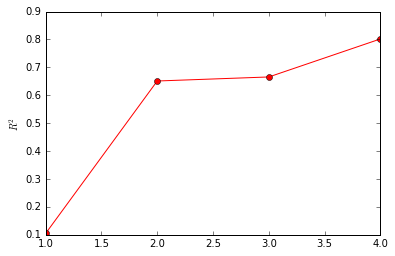

In [15]:
#(d)
plt.figure()
plt.plot(range(1,5),R2,'ro-')
plt.ylabel('$R^2$')
print(R2)

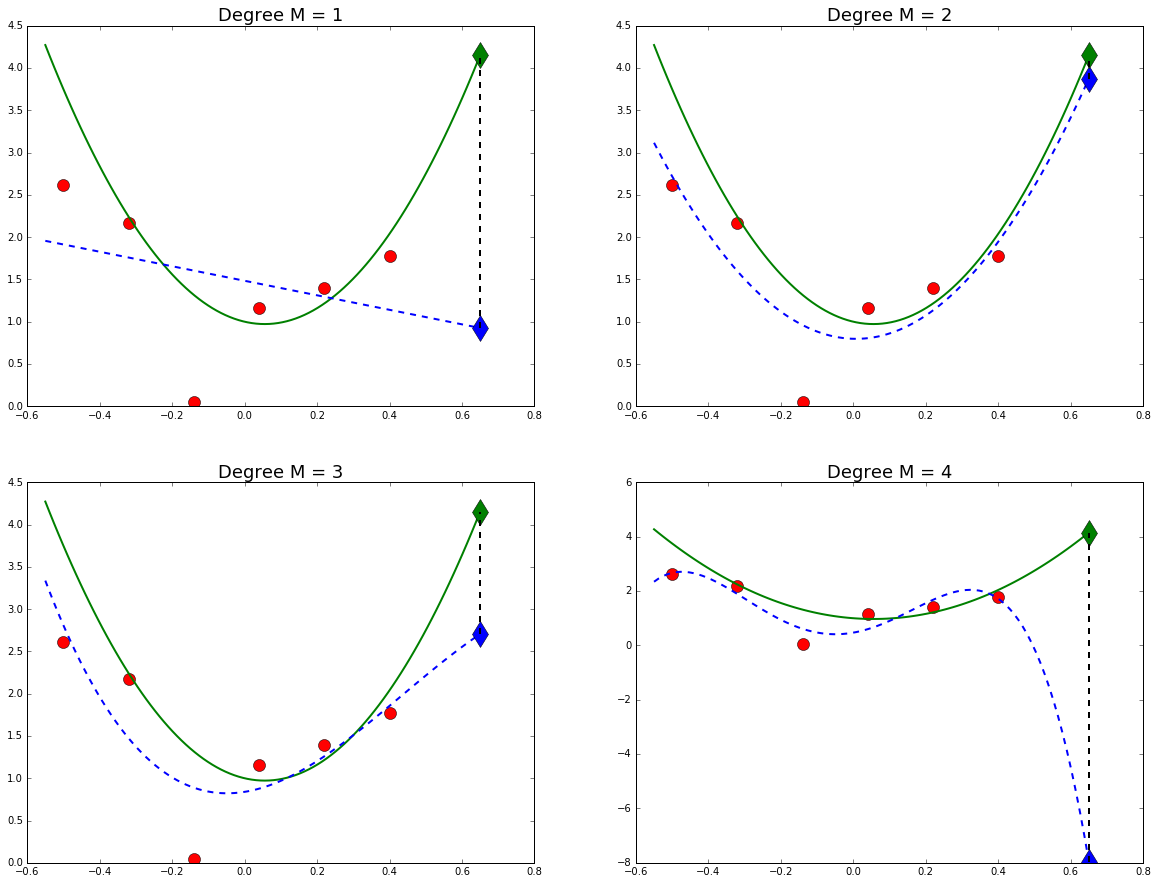

In [16]:
#(e)   Pick M = 2
f = lambda x: 9*x**2 - x + 1

fig = plt.figure(figsize = (20,15))
for M in range(1,5):
    ax = fig.add_subplot(220+M)
    x_fit = np.linspace(-0.55,0.65,100)# Students are free to choose the endpoints here as long as their plots make sense
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)

    ax.plot(ex3.x1, ex3.y, 'ro', markersize = 12)    # Red dots, the observations
    ax.plot(x_fit, f(x_fit), 'g-', lw = 2)           # Green curve, the true function
    ax.plot(x_fit, y_fit, 'b--', lw = 2)             # Blue line, fitted curve
    plt.title('Degree M = %d'%(M), fontsize = 18)
    
    
    # The following are for extra credis (g)
    y_out = 0
    x_out = 0.65
    for i in range(len(Params[M-1])):
        y_out += Params[M-1][i] * (x_out**i)
    ax.plot(x_out, y_out, 'bd', markersize = 18)
    ax.plot(x_out, f(x_out), 'gd', markersize = 18)
    ax.plot([x_out,x_out], [y_out, f(x_out)], 'k--', lw = 2)

In [17]:
#(f) Students are expected to answer something like "Pick the model with M = 2, quadratic function." Then provide:
Params[1]

Intercept    0.797871
x1          -0.112869
x2           7.459218
dtype: float64

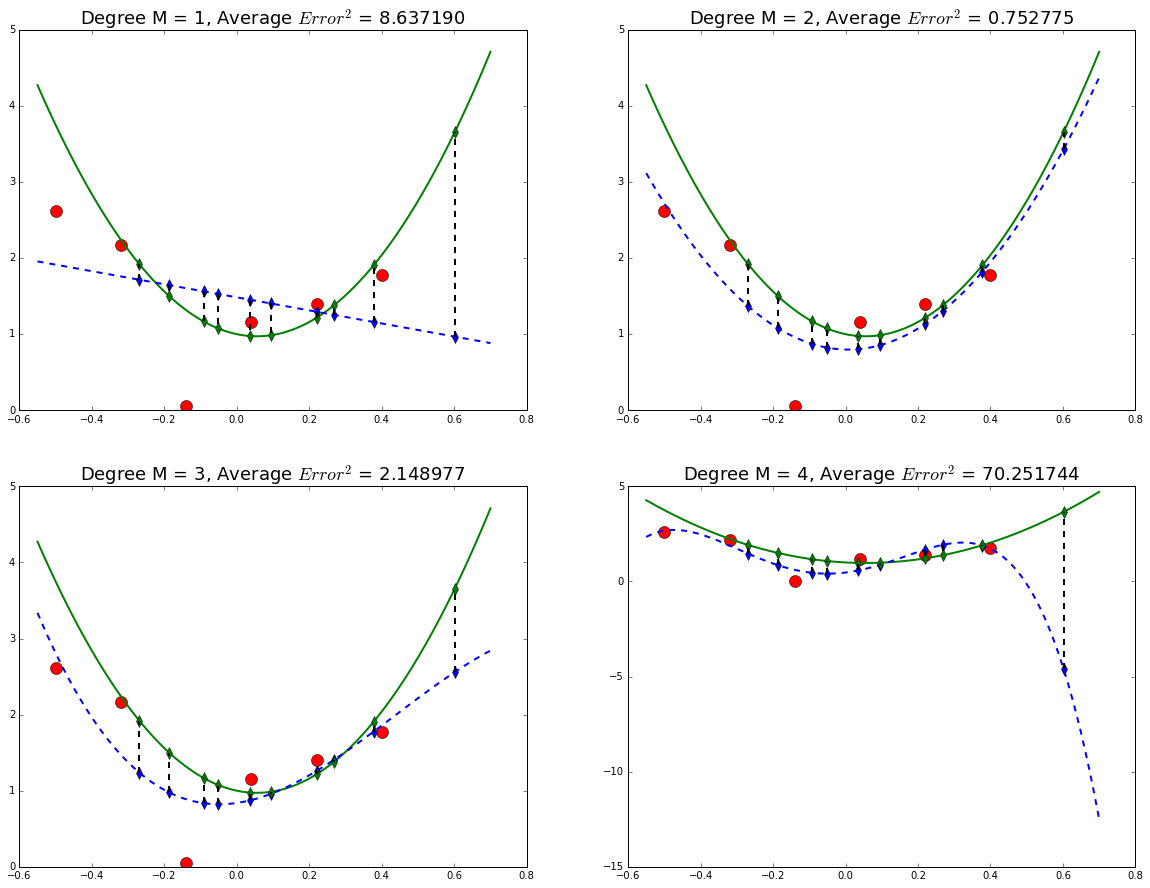

In [28]:
fig = plt.figure(figsize = (20,15))
trial = np.random.uniform(-0.5, 0.7, 10)
for M in range(1,5):
    ax = fig.add_subplot(220+M)
    x_fit = np.linspace(-0.55,0.7,100)# Students are free to choose the endpoints here as long as their plots make sense
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range(M+1)]).T,
                         columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)

    ax.plot(ex3.x1, ex3.y, 'ro', markersize = 12)    # Red dots, the observations
    ax.plot(x_fit, f(x_fit), 'g-', lw = 2)           # Green curve, the true function
    ax.plot(x_fit, y_fit, 'b--', lw = 2)             # Blue line, fitted curve
    
    
    # The following are for extra credis (g)
    error = 0
    for j in range(10):
        y_trial = 0
        x_trial = trial[j]
        for i in range(len(Params[M-1])):
            y_trial += Params[M-1][i] * (x_trial**i)
        ax.plot(x_trial, y_trial, 'bd', markersize = 8)
        ax.plot(x_trial, f(x_trial), 'gd', markersize = 8)
        ax.plot([x_trial,x_trial], [y_trial, f(x_trial)], 'k--', lw = 2)
        error += (y_trial-f(x_trial))**2
        
    plt.title('Degree M = %d, Average $Error^2$ = %f'%(M,error), fontsize = 18)

# Thank you!